# Lab 0: Getting familiar with the software environment

OpenAI gym environment setup. You may want to try this with other environments such as CartPole-v0. See https://gym.openai.com/envs/ for **many** other examples. The environment may not render here, but on a personal computer you should be able to see the simulation.

In [2]:
import numpy as np
import gym
###추가###
print("numpy version", np.__version__)
print("gym version", gym.__version__)
###추가###
env=gym.make('FrozenLake-v1') #or 'FrozenLake-v1' depending on your PC
env.reset()
env.render() #For graphic environments like CartPole-v0 you will have to comment this here. 
             #But, on your personal computer, you should be able to render it.

numpy version 1.24.2
gym version 0.26.2


/home/simonjisu/.local/share/virtualenvs/rl_2023spring-FuEMe-5O/lib/python3.10/site-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


Below we illustrate the execution of the Open AI gym enviornment using the policy of chosing random action in every state. Every time an action is taken the enviorment returns a tuple containing next state, reward, and the status (whether terminal state is reached or not). The variable `reward` is recording the "total reward" of the policy over an episode of length 100. 

In [5]:
rList = [] #lost oftotal reward for each episodes
num_episodes=500
episode_max_length=100

s=env.reset()
#execute in episodes
for i in range(num_episodes):
    d = False #not done
    reward=0
    for t in range(episode_max_length):
        
        ################YOUR CODE HERE################
        #play random action 
        a = env.action_space.sample()
        #get new state, reward, done
        s, r, d, *_ = env.step(a)
        reward+=r
        #break if done, reached terminal state 
        if d == True:
            break
    #reset the environment for the next episode
    s = env.reset()
    #reward for the episode
    rList.append(reward)


The code below analyzes how this random policy performs. It plots moving average of reward over 100 consecutive episodes.
This most likely does not perform very well. You can try playing with some other simple policies and see how they perform for different environments.

In [9]:
from numpy import convolve, ones
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'valid')

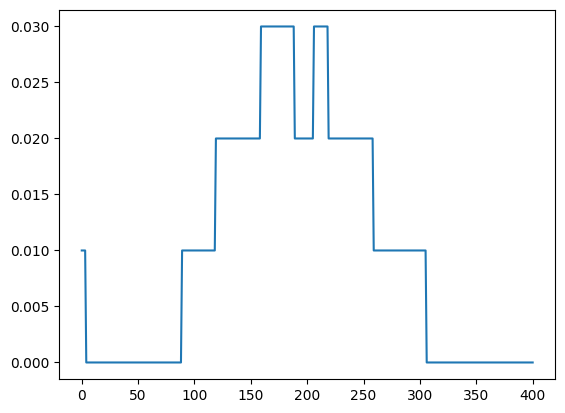

In [10]:
from pylab import plot
%matplotlib inline 
rm=movingaverage(rList, 100)
plot(rm)

In your programming assignments, you will be given a skeleton of code like above. You will be asked to make changes to the code to achieve specific tasks and then submit the notebook as your submission for the assignment. Save this notebook file (after you run the code) and submit "Lab 0.ipynb" on eTL. This will not be graded but will help us ensure that everything is set up correctly on your machine.

If you have any trouble on running this code on your machine, I recommend you to use the Google Colab.
